# An Example Attack On Plant Inputs

In [ ]:
import pynini as pn
syms = pn.SymbolTable()
syms.add_symbol('e')  # Epsilon (empty character)
syms.add_symbol('i1')
syms.add_symbol('i2')

## Plant $\mathcal{P}$

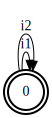

In [3]:
P = pn.epsilon_machine()
P.add_arc(0,pn.Arc(1,1,0,0)).add_arc(0,pn.Arc(2,2,0,0))
P.set_input_symbols(syms).set_output_symbols(syms)

## Model of the Desired Language $K$ 

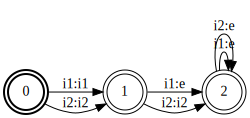

In [4]:
MK = pn.epsilon_machine()
MK.add_state()
MK.set_final(1)
MK.add_arc(0,pn.Arc(1,1,0,1)).add_arc(0,pn.Arc(2,2,0,1))
MK.add_state()
MK.set_final(2)
MK.add_arc(1,pn.Arc(1,0,0,2)).add_arc(1,pn.Arc(2,2,0,2))
MK.add_arc(2,pn.Arc(1,0,0,2)).add_arc(2,pn.Arc(2,0,0,2))
MK.set_input_symbols(syms).set_output_symbols(syms)

## Input Attacker $\mathcal{A}_{I}$

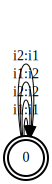

In [5]:
AI = pn.epsilon_machine()
AI.add_arc(0,pn.Arc(1,1,0,0)).add_arc(0,pn.Arc(2,2,0,0))
AI.add_arc(0,pn.Arc(1,2,0,0)).add_arc(0,pn.Arc(2,1,0,0))
AI.set_input_symbols(syms).set_output_symbols(syms)

## Supervisor $\mathcal{S}$
$$
\mathcal{S} = \mathcal{M}_K \circ \mathcal{A}^{-1}_I
$$

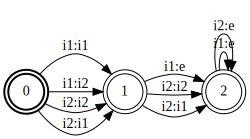

In [6]:
S = pn.compose(MK,pn.invert(AI))
S.set_input_symbols(syms).set_output_symbols(syms)

## Output Language $L_O(\mathcal{S} \circ \mathcal{A}_I)$

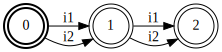

In [7]:
LO = pn.compose(S,AI).project(project_output=True).optimize()
LO